In [1]:
import numpy as np, pandas as pd
from IPython.display import Image
import matplotlib.pyplot as plt, seaborn as sns
import scipy
import warnings
import plotly.express as px
from itertools import product
import statsmodels.api as sm
import datetime
from tqdm import tqdm
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('country_vaccinations.csv')
data = data.drop(data[data.total_vaccinations.isna()].index)
data.head(5)

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN,Oxford/AstraZeneca,Government of Afghanistan,https://reliefweb.int/report/afghanistan/afgha...
6,Afghanistan,AFG,2021-02-28,8200.0,8200.0,NaN,NaN,1367.0,0.02,0.02,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,https://reliefweb.int/report/afghanistan/afgha...
22,Afghanistan,AFG,2021-03-16,54000.0,54000.0,NaN,NaN,2862.0,0.14,0.14,NaN,74.0,Oxford/AstraZeneca,Government of Afghanistan,https://reliefweb.int/report/afghanistan/afgha...
44,Afghanistan,AFG,2021-04-07,120000.0,120000.0,NaN,NaN,3000.0,0.31,0.31,NaN,77.0,Oxford/AstraZeneca,Government of Afghanistan,https://reliefweb.int/report/afghanistan/afgha...
59,Afghanistan,AFG,2021-04-22,240000.0,240000.0,NaN,NaN,8000.0,0.62,0.62,NaN,206.0,Oxford/AstraZeneca,Government of Afghanistan,https://reliefweb.int/report/afghanistan/afgha...


In [3]:
data.date = pd.to_datetime(data.date)
print(data.date.dtypes, data.total_vaccinations.dtypes)

datetime64[ns] float64


In [4]:
data['day'] = list(map(lambda v : v.day, data['date']))

In [5]:
data['date'] = data['date'].map(datetime.datetime.toordinal)

In [6]:
print(data.date.dtypes)

int64


In [7]:
# the first two lines of the code can be used to zoom in and out of the data by cutting out data on the x and y-axis

data = data.loc[data['total_vaccinations'] < 10000000]
# data = data.loc[data['date'] < 737860]
X = data['date']
y = data['total_vaccinations']
data.head(5)

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website,day
0,Afghanistan,AFG,737843,0.0,0.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN,Oxford/AstraZeneca,Government of Afghanistan,https://reliefweb.int/report/afghanistan/afgha...,22
6,Afghanistan,AFG,737849,8200.0,8200.0,NaN,NaN,1367.0,0.02,0.02,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,https://reliefweb.int/report/afghanistan/afgha...,28
22,Afghanistan,AFG,737865,54000.0,54000.0,NaN,NaN,2862.0,0.14,0.14,NaN,74.0,Oxford/AstraZeneca,Government of Afghanistan,https://reliefweb.int/report/afghanistan/afgha...,16
44,Afghanistan,AFG,737887,120000.0,120000.0,NaN,NaN,3000.0,0.31,0.31,NaN,77.0,Oxford/AstraZeneca,Government of Afghanistan,https://reliefweb.int/report/afghanistan/afgha...,7
59,Afghanistan,AFG,737902,240000.0,240000.0,NaN,NaN,8000.0,0.62,0.62,NaN,206.0,Oxford/AstraZeneca,Government of Afghanistan,https://reliefweb.int/report/afghanistan/afgha...,22


Text(0, 0.5, 'Total Vaccinations')

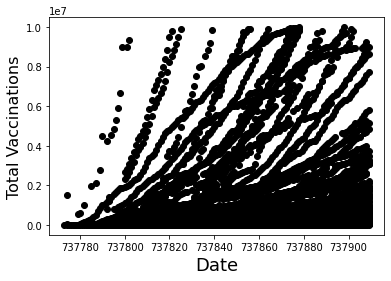

In [8]:
plt.scatter(X, y, color='black')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Total Vaccinations', fontsize=16)

In [9]:
y.describe()

count    7.982000e+03
mean     1.140288e+06
std      1.957419e+06
min      0.000000e+00
25%      4.881975e+04
50%      3.036210e+05
75%      1.209351e+06
max      9.985806e+06
Name: total_vaccinations, dtype: float64

In [10]:
# It can be seen that the dataset itself is sparse but seems dense since the scale of the data is large. As we zoom in,
# the data gets more sparse and it becomes harder to remove the outliers. The sparsity is clear when the data is viewed
# statistically. The output of line [9] shows that there is a huge difference between the min value and the 25% mark
# also there is a huge difference between the 25%, 50% and 75% marks also. This much difference between each statistical
# stage shows a high level of sparsity. With this level of sparsity, it is not possible to map algorithms like linear
# regression and bayesian ridge regression that work using linear equations.

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [12]:
lr = LinearRegression()
br = BayesianRidge()

In [13]:
lr.fit(X_train.values.reshape(-1, 1), y_train)
br.fit(X_train.values.reshape(-1, 1), y_train)

BayesianRidge()

In [14]:
lr_pred = lr.predict(X_test.values.reshape(-1, 1))
br_pred = br.predict(X_test.values.reshape(-1, 1))

# Linear Regression Results

In [15]:
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, lr_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, lr_pred))

Mean squared error: 3867672478744.38
Coefficient of determination: 0.03


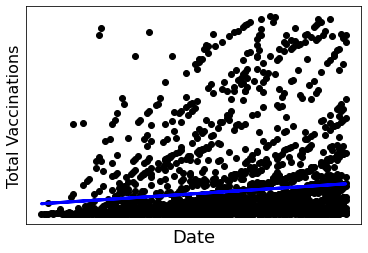

In [16]:
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, lr_pred, color='blue', linewidth=3)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Total Vaccinations', fontsize=16)

plt.xticks(())
plt.yticks(())

plt.show()

# Bayesian Ridge Regression Results

In [17]:
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, br_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, br_pred))

Mean squared error: 3868128309783.46
Coefficient of determination: 0.03


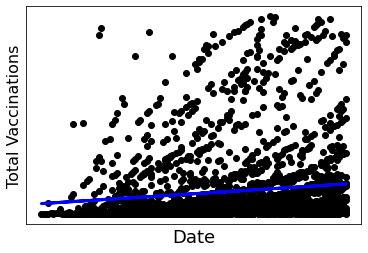

In [18]:
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, br_pred, color='blue', linewidth=3)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Total Vaccinations', fontsize=16)

plt.xticks(())
plt.yticks(())

plt.show()